# Basic EDA
Load the Vicomtech dataset and look at a few quick stats.

In [6]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [7]:
import pandas as pd
from IPython.display import display
from src.data_loader import load_vicomtech_data

In [8]:
try:
    df = load_vicomtech_data(raw_path='../data/raw/VicomtechToolWearData.csv')
    print('Data shape:', df.shape)
    display(df.head())
except FileNotFoundError as e:
    print(e)

Data shape: (2054, 154)


,ae_max,ae_kurt,ae_var,ae_rms,ae_c_0_1,ae_c_0_15,ae_cf,ax1_rms,ax1_sk,ax1_mean,...,cv3_z_mean,cv3_z_max,cv3_z_kurt,con_sv2_s,con_sv2_x,con_sv2_z,con_g_freal,con_a_sreal_s,tool_id,vb
0,0.203665,4.044778,0.000731,0.027032,2310,42,7.534123,5.223149,-0.124066,0.020679,...,13.512,24,2.318726,23939045.05,1370.871415,233815.587100,2260.913532,8.155288e+06,5,0.000
1,0.194863,3.991339,0.000728,0.026977,2078,33,7.223210,5.127170,-0.127610,-0.028392,...,13.280,22,2.242422,23936873.29,1503.875567,233795.071899,2263.317532,8.153697e+06,5,2.172
2,0.203046,4.007360,0.000717,0.026781,2019,39,7.581602,5.151557,-0.132910,0.017371,...,13.240,23,2.398679,23936274.49,1417.811116,234333.251100,2266.488887,8.156394e+06,5,4.345
3,0.206462,4.007104,0.000716,0.026767,2105,32,7.713290,5.129690,-0.122920,-0.008704,...,13.240,23,2.215272,23941252.24,1357.918489,234497.141218,2267.637296,8.155210e+06,5,6.517
4,0.197119,4.016845,0.000714,0.026724,2053,29,7.376236,5.205071,-0.131262,-0.018240,...,12.948,21,2.267548,23936992.41,1388.865576,234292.008305,2268.203688,8.154652e+06,5,8.690


In [9]:
if 'df' in globals():
    display(df.describe())

,ae_max,ae_kurt,ae_var,ae_rms,ae_c_0_1,ae_c_0_15,ae_cf,ax1_rms,ax1_sk,ax1_mean,...,cv3_z_mean,cv3_z_max,cv3_z_kurt,con_sv2_s,con_sv2_x,con_sv2_z,con_g_freal,con_a_sreal_s,tool_id,vb
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,...,2054.000000,2054.000000,2054.000000,2.054000e+03,2.054000e+03,2.054000e+03,2054.000000,2.054000e+03,2054.000000,2054.000000
mean,1.593842,196.060022,0.001680,0.036340,10129.466894,4473.583739,38.981415,4.909105,-0.332877,0.000399,...,13.281275,22.952288,2.309994,2.507890e+07,8.391343e+03,2.506295e+05,2472.108702,8.543784e+06,9.929893,151.103928
std,1.392936,324.158490,0.002246,0.018955,12856.011137,6414.753370,24.174284,1.811544,0.244376,0.212287,...,1.683646,2.806412,0.973607,4.677596e+06,1.473890e+05,2.015819e+05,2302.228591,1.595050e+06,4.110736,116.604515
min,0.061356,2.805944,0.000010,0.003175,0.000000,0.000000,4.518057,3.125334,-1.342878,-2.394990,...,9.796000,11.000000,1.961180,2.028914e+07,1.190804e+03,3.154739e+03,0.000000,6.906771e+06,3.000000,0.000000
25%,0.385372,5.342205,0.000608,0.024668,1991.000000,135.000000,17.753909,4.021564,-0.497152,-0.011419,...,12.344000,22.000000,2.214450,2.205876e+07,1.652915e+03,2.118221e+05,2050.792374,7.513811e+06,6.000000,74.774000
50%,1.202854,59.669365,0.000945,0.030743,5785.000000,2290.000000,37.196993,4.180038,-0.445624,0.000179,...,12.946000,23.000000,2.270330,2.393700e+07,2.243462e+03,2.339160e+05,2263.364164,8.154236e+06,10.000000,124.690000
75%,2.430667,266.484592,0.001927,0.043900,13970.500000,6370.250000,55.132377,5.700836,-0.106531,0.011917,...,13.651000,23.000000,2.320690,2.616818e+07,2.665118e+03,2.568052e+05,2480.497737,8.915363e+06,14.000000,187.408000
max,7.419777,3883.077071,0.023126,0.152073,173293.000000,83476.000000,140.091565,15.241643,2.586992,1.841509,...,29.664000,74.000000,34.246011,3.630060e+07,4.078587e+06,8.669162e+06,84091.877980,1.237179e+07,16.000000,792.346000


## Target distribution

In [11]:
if 'df' in globals():
    display(df['vb'].value_counts())

vb
71.000     116
143.000     38
92.000      35
81.000      32
0.000       10
          ... 
188.625      1
189.250      1
189.875      1
190.500      1
54.310       1
Name: count, Length: 1738, dtype: int64

## Sensor histograms

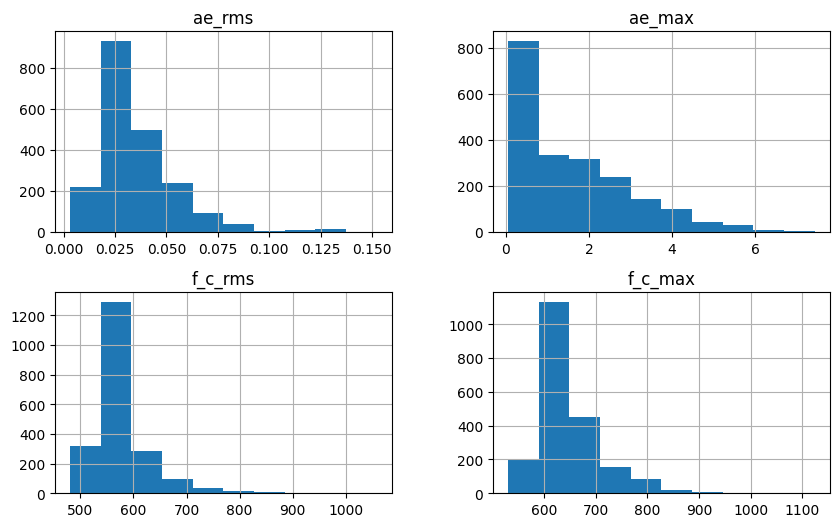

In [12]:
if 'df' in globals():
    df[['ae_rms', 'ae_max', 'f_c_rms', 'f_c_max']].hist(figsize=(10,6))

## Correlation heatmap

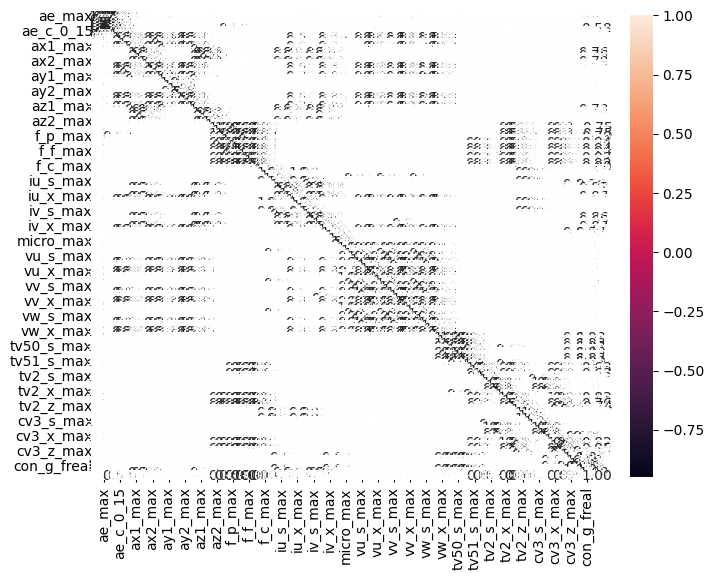

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
if 'df' in globals():
    plt.figure(figsize=(8,6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')

## Outlier detection

In [14]:
if 'df' in globals():
    numeric_cols = df.select_dtypes(include='number')
    z_scores = (numeric_cols - numeric_cols.mean())/numeric_cols.std()
    outlier_counts = (z_scores.abs() > 3).sum()
    display(outlier_counts[outlier_counts > 0])

ae_max         18
ae_kurt        44
ae_var         38
ae_rms         35
ae_c_0_1       51
               ..
cv3_z_kurt      6
con_sv2_x       3
con_sv2_z       2
con_g_freal     5
vb             50
Length: 124, dtype: int64